# ✍️.2 Simpson's Paradox

**Guides**: Niharika and Ravi

<img src="simpsonshowchart.png" style="width: 400px;"/>

## Goals

- **Resolving Simpson's Paradox** in a handful of settings
- Practice **honing your "data sense"**, **asking incisive questions of your data**, and **thinking conditionally**
- **Getting out the vote**!

## Motivation 🇺🇸 

**Fun Fact**: Did you know that there's an election this year?

---

To get everyone warmed up and the \[brain\] juices flowing, we're going to ask something very onerous of you: **to fill in 6 cells in a spreadsheet**. The keen observer will notice that this is a 100% increase in what I demanded of Shreyas in my last lesson.

**Question**:

> Who among you will step forward and carry this heavy burden so that your peers may marvel at your aptitude and learn from you, the boundless fount of knowledge that you are?

**TODO**: 

> Let's go ahead an open up the warm up exercise, [Rich State, Poor State, Red State, Blue State](https://docs.google.com/spreadsheets/d/1PNCr4Q1SWYvC_BuliivMSZZClbTai_s_R5SOoXdKSz4/edit#gid=0). **Make a copy of the sheet and label it with your name.**

> *Remember, our [DA Probability & Statistics GDrive](https://drive.google.com/drive/folders/1ebuHd3aKd1VUDScSGeVzB9rxe2Q-yldF?usp=sharing) (+ this repo) holds all the material you'll need!*

**Question**:

> How is it possible that you're more likely to be a Democrat if you are rich than if you were poor *at the national level*, but the opposite is true within each and every state?

**Answer**:

> There's a confounding variable: **the distribution of rich vs. poor by state**!  

> Using our probability notation, $P(\text{\$}|\text{B}) \gt P(\text{₵}|\text{B})$. The probability of being rich *given* you're in a Blue state is **so much greater** that it overrides the fact that $P(\text{D}|\$, \text{B}) \lt P(D|\text{₵}, \text{B})$ and $P(\text{D}|\$, \neg\text{B}) \lt P(D|\text{₵}, \neg\text{B})$ are both true! This is what causes the aggregation to suggest that $P(\text{D}|\$) \gt P(\text{D}|\text{₵})$.

(See the handwritten note in my solution in the spreadsheet.)

**Upshot**: 

> When presented aggregate data, think about **confounding factors** (or *mediators*, if you're coming from the causal analysis world).  

Ask yourself, "How might \[a potential confounding variable\] **coincide with** or **be obscured by** what the aggregation is suggesting?"

These ways of thinking will aid you in answering this question:

- **Counterfactuals**: "In a world where this aggregate information did *not* suggest this, we would expect \[a potential confounding variable\] to be higher/lower, increasing/decreasing, etc."


- **Hypotheticals**: "If the trend in \[a potential confounding variable\] was different, how might this affect the data in aggregate?"


- **Simple and Extreme Cases**: "What would happen if \[a potential confounding variable\] were maximized/minimized or all of one type (vs. another)?"

**Upshot**: Be a relentless skeptic. Even if it's annoying.

**Question**:

> Have you voted yet?

**Answer**:

> "Yes, I have already or will have come November 3rd"

> "No, I am not eligible to vote"

> "You're goddamn right I did, I'm a red-white-and-blue-blooded American."

<br>
<img src="https://images.kerrangcdn.com/KERRANG_MURICA_2400x1350.jpg?auto=compress&fit=crop&w=2016&h=1134" width=600 \>
<br>

## What is Simpson's Paradox?

In short, **Simpson's paradox** occurs when groups of data show one particular trend, but this trend is reversed when the groups are combined together. 

Also known as the <b>Yule-Simpson effect</b>, this is a simple mathematical trick in which weighted averages can misrepresent relationships between groups of data.

<p float="left">
    <img src="agg.png" width ="400" align="left" />
    <img src="subgroups.png" width ="400" />
</p>

### Example: UC Berkeley Graduate Programs' Admission Rates

A classic example of thus is from 1973 where UC Berkeley 🐻 Admissions was sued for bias against women applying to grad school.  Data showed that 44% of men were
admitted whereas only 30% of women were admitted. Since admission is decided by departments, the University decided to investigate which departments were ”discriminating” against women.

However, when examining the individual departments, it appeared that six out of 85 departments were significantly biased against men, whereas four were significantly biased against women. In fact, the pooled and corrected data showed a "small but statistically significant bias in favor of women". 

<br>
<img src="admissionschart.png" style="width: 400px;"/>

A research paper (Bickel et. al.) concluded that **women tended to apply to more competitive departments with low rates of admission** for qualified applicants (such as in the English Department), whereas **men tended to apply to less competitive departments with high rates of admission** for qualified applicants (such as in engineering and chemistry).

**Upshot**:

- Too much aggregation can become irrelevant or misleading, depending on the intended use of a metric
- Important to visualize + stratify data into subpopulations (departments in the case above)
- It reminds us significantly of critical thinking when dealing with data as well looking for hidden biases and confounding variables, especially when we don't know the data collection processes
- Domain knowledge is important -- the data cannot speak for itself!

<b> TLDR: </b> Simpson’s paradox can be avoided with the help of reviewing frequency tables and correlations along with a thorough understanding of the business problem being studied.

### Example: Covid-19 Case Fatality Rates

When comparing case fatality rates (CFRs) of COVID-19 for different age groups (i.e., the proportion of confirmed cases within that age group which ended deadly) reported by the Chinese Center for Disease Control and Prevention (CCDCP) with preliminary CFRs in Italy as reported by the Italian National Institute of Health (ISS, for Istituto Superiore di Sanità), a seemingly strange phenomenon can be observed:

> - for any given age group, the CFR in Italy was lower than that in China;
> - overall, the CFR in Italy (4.3%) was higher than that in China (2.3%).

The next few code cells import libraries, class for datasets as well as data sets & plotting functions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

In [2]:
class Covid19Dataset():
    """A class for datasets with case and fatality numbers stratified by age 
    group for different countries.
    """
    def __init__(self,
                country,
                date,
                confirmed_cases,
                fatalities,
                source,
                comments=None,
                age_ranges=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59',
                            '60-69', '70-79','80+']
                ):
        self.country = country
        self.date = date
        self.confirmed_cases = np.array(confirmed_cases)
        self.fatalities = np.array(fatalities)
        self.source = source
        self.comments = comments
        self.age_ranges = age_ranges

    def compute_stats(self):
        self.cfr = self.fatalities/ self.confirmed_cases
        self.total_cases = sum(self.confirmed_cases)
        self.case_rates_by_age = self.confirmed_cases/self.total_cases
        self.total_cfr = sum(self.case_rates_by_age * self.cfr)

In [3]:
def autolabel(rects, ax, decimal_points=1):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        # Thanks to Ehud Karavani for fixing the annotation for negative numbers
        text_offset = (0, 3) if height >= 0 else (-2, -13)
        ax.annotate(f"{height:.{decimal_points}f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=text_offset,
                    textcoords="offset points",
                    ha='center', va='bottom')

def bar_chart_by_age(datasets, type):
    try:
        n_data = len(datasets)
        labels = datasets[0].age_ranges
    except TypeError:
        print("Error: please provide a valid Covid19Dataset.")
    
    x = 1.25 * np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots()
    ax.set_xlabel('Age')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    i = 0
    for data in datasets:
        data_id  = data.country + ', ' + data.date
        if type == 'cases_by_age':
            ax.set_ylabel('%')
            ax.set_title('Proportion of confirmed cases by age group')
            y = 100 * data.case_rates_by_age
            bar = ax.bar(x - 1/2 + i/n_data, y, 1/n_data, label=data_id)
    
        elif type == 'cfr':
            ax.set_ylabel('%')
            ax.set_title('Case fatality rates (CFRs) by age group')
            y = 100 * data.cfr
            bar = ax.bar(x - 1/2+ i/n_data, y, 1/n_data, label=data_id)
        
        i += 1
        # autolabel(bar, ax)

    ax.legend()
    fig.tight_layout()
    plt.show()
    return fig

In [4]:
Italy_data = Covid19Dataset(
    country = 'Italy',
    date = '9 March', 
    confirmed_cases = [43, 85, 296, 470, 891, 1453, 1471, 1785, 1532],
    fatalities = [0, 0, 0, 0, 1, 3, 37, 114, 202],
    source = {
        'type': 'official report',
        'date': '9 March 2020, 4pm',
        'author': 'Istituto Superiore di Sanità \
            (ISS, Italian National Institute of Health)',
        'url': 'https://www.epicentro.iss.it/coronavirus/bollettino/Bollettino-\sorveglianza-integrata-COVID-19_09-marzo-2020.pdf'
        },
)

In [5]:
China_data = Covid19Dataset(
    country = 'China',
    date = '17 February', 
    confirmed_cases = [416, 549, 3619, 7600, 8571, 10008, 8583, 3918, 1408],
    fatalities = [0, 1, 7, 18, 38, 130, 309, 312, 208],
    source = {
        'type': 'scientific publication',
        'title': 'Characteristics of and important lessons from the coronavirus\
            disease 2019 (COVID-19) outbreak in China: summary of a report of\
            72 314 cases from the Chinese Center for Disease Control and Prevention',
        'author': 'Wu, Zunyou and McGoogan, Jennifer M',
        'journal': 'Jama',
        'date': '24 February 2020',
        'url': 'https://jamanetwork.com/journals/jama/fullarticle/2762130'
        },
)

In [6]:
datasets = [China_data, Italy_data]
for data in datasets:
    data.compute_stats()

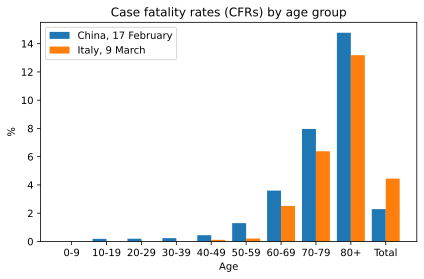

In [7]:
labels = China_data.age_ranges + ['Total']
x = 1.25*np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
ax.set_xlabel('Age')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('%')
ax.set_title('Case fatality rates (CFRs) by age group')
w = 0.5

China_id = China_data.country + ', ' + China_data.date
China_data = np.append(100*China_data.cfr, 100*China_data.total_cfr)
ax.bar(x - w/2, China_data, w, label=China_id)

Italy_id = Italy_data.country + ', ' + Italy_data.date
Italy_data = np.append(100*Italy_data.cfr, 100*Italy_data.total_cfr)
ax.bar(x + w/2, Italy_data, w, label=Italy_id)

ax.legend()
fig.tight_layout()
plt.show()

**Question**:

> What's going on? What explains this?

**Answer**:

This looks like a classic example of Simpson's paradox, which refers to the observation that aggregating data across subpopulations may lead to opposite conclusions from considering the different subpopulations separately.

The **distribution of *confirmed* cases across age groups differs significantly between the two countries**, i.e. there is a statistical association between country and the number of confirmed cases per age group. The proportion of cases in any given age range is not reflected in the CFRs plotted above, thus leading to this counterintuitive behavior.

This finding is confirmed when we ask the right question of our data: **What is the distribution of confirmed cases by age group in each country?"

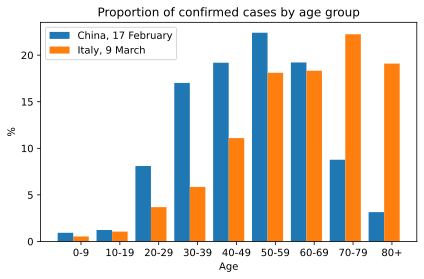

In [8]:
fig = bar_chart_by_age(datasets, 'cases_by_age')
plt.show()

By looking at relative frequencies which correspond to the *conditional probabilities of fatality given a case from a particular age group and country*, we uncover a truth that *unconditional probabilities* conceal: the absolute numbers of cases within each age group.

**Question**:

> So, can we safely say it all comes down to demographics?

**Answer**:

> Maybe...but we haven't considered other *confounding factors*. **Confirmed cases by age group** is probably largely driven by demographics, but what about testing practices in each country? Housing and conditions of the elderly? Healthcare systems? Discrepancies in reporting? Time of calculation? Interdemographic mixing? 

## Appendix

Here are a few resources that may help you (programmatically) check your data for Simpson's paradoxes!

- [Paper - How to Detect the Simpson's Paradox](https://aaai.org/ocs/index.php/FLAIRS/FLAIRS18/paper/view/17641/16887)

- [Code to Detect Simpson's Paradox](https://github.com/CamDavidsonPilon/simpsons-paradox/blob/master/detect_paradox.py)
